# Implement the Continuous Bag of Words (CBOW) Model. Stages can be:

Data preparation
Generate training data
Train model
Output

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,\
	Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import stopwords

# Download the stopwords list if you haven't already
nltk.download("stopwords")

# Define the corpus
corpus = ["Natural language processing is a subfield of artificial intelligence that deals with the interaction between computers and humans through natural language.",
    "Text data can be preprocessed to remove stopwords, punctuation, and perform stemming or lemmatization.",
    "Machine learning models, such as deep neural networks, can be used for text classification, sentiment analysis, and language translation tasks.",
    "The field of natural language processing has made significant advancements in recent years with the development of transformer-based models like BERT, GPT-3, and more.",
    "NLP applications include chatbots, voice assistants, language translation services, and content summarization tools.",
    "To work with text data effectively, it's important to clean and preprocess the data, tokenize it, and represent it in a format suitable for machine learning models.",
    "Removing stopwords helps in focusing on the most important words or phrases in the text, while stemming and lemmatization reduce words to their base forms.",
    "In text classification, a model learns to categorize text documents into predefined classes or labels, such as spam detection, sentiment analysis, or topic classification.",
    "In sentiment analysis, the goal is to determine the emotional tone of a piece of text, such as positive, negative, or neutral sentiment.",
    "The Transformer architecture, introduced by Vaswani et al., has revolutionized natural language processing by enabling attention mechanisms and self-attention for capturing context in text.",
    "Some common libraries for natural language processing in Python include NLTK, spaCy, scikit-learn, and Hugging Face Transformers library.",
    "Pretrained language models, such as GPT-3 and BERT, have achieved state-of-the-art performance in a wide range of NLP tasks.",
    "Text generation tasks involve creating human-like text, which can be achieved using recurrent neural networks (RNNs) or transformer-based models.",
    "Language translation is a crucial application of NLP, with neural machine translation models being highly effective in translating text between languages.",
    "In summary, natural language processing is a dynamic and rapidly evolving field that has applications in various domains, from healthcare to finance and entertainment."]

tokenized_corpus = []

stop_words = set(stopwords.words("english"))

for text in corpus:
    words = text.lower().split()  # Convert to lowercase and split into words
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    tokenized_corpus.append(" ".join(words))

# Convert the corpus to a sequence of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_corpus)
sequences = tokenizer.texts_to_sequences(tokenized_corpus)
print("After converting our words in the corpus \
into vector of integers:")
print(sequences)


After converting our words in the corpus into vector of integers:
[[3, 2, 5, 33, 118, 34, 35, 36, 119, 37, 38, 39, 3, 2], [1, 8, 40, 41, 16, 42, 43, 17, 18], [9, 19, 4, 44, 10, 20, 45, 1, 11, 6, 12, 2, 7, 13], [119, 21, 118, 3, 2, 5, 46, 47, 48, 49, 50, 119, 51, 118, 14, 22, 4, 23, 24, 25, 26, 52], [15, 27, 28, 53, 54, 55, 2, 7, 56, 57, 58, 59], [60, 1, 8, 61, 29, 62, 63, 119, 8, 64, 65, 66, 65, 67, 68, 9, 19, 4], [69, 16, 70, 71, 119, 29, 30, 72, 119, 1, 17, 18, 73, 30, 74, 75], [1, 11, 76, 77, 78, 1, 79, 80, 81, 82, 83, 84, 6, 12, 85, 11], [6, 12, 119, 86, 87, 119, 88, 89, 118, 90, 118, 1, 91, 92, 93, 6], [119, 14, 94, 95, 96, 97, 98, 99, 3, 2, 5, 100, 31, 101, 102, 31, 103, 104, 1], [105, 106, 3, 2, 5, 107, 28, 108, 109, 110, 111, 112, 113, 114, 115], [116, 2, 4, 25, 26, 24, 32, 117, 118, 119, 120, 121, 122, 123, 118, 15, 13], [1, 124, 13, 125, 126, 127, 23, 1, 32, 128, 129, 10, 20, 130, 14, 22, 4], [2, 7, 131, 132, 118, 15, 10, 9, 7, 4, 133, 134, 135, 1, 136], [137, 3, 2, 5, 138, 1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RASIKA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# Define the parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_size = 10
window_size = 2

# Generate the context-target pairs
contexts = []
targets = []
for sequence in sequences:
	for i in range(window_size, len(sequence) - window_size):
		context = sequence[i - window_size:i] +\
			sequence[i + 1:i + window_size + 1]
		target = sequence[i]
		contexts.append(context)
		targets.append(target)

# Convert the contexts and targets to numpy arrays
X = np.array(contexts)

# Define the CBOW model
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
					output_dim=embedding_size,
					input_length=2*window_size))
model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))
model.add(Dense(units=vocab_size, activation='softmax'))
model.save_weights('cbow_weights.h5')


# Load the pre-trained weights
model.load_weights('cbow_weights.h5')


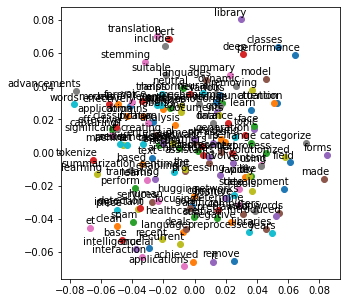

In [12]:
# Get the word embeddings
embeddings = model.get_weights()[0]

# Perform PCA to reduce the dimensionality
# of the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Visualize the embeddings
plt.figure(figsize=(5, 5))
for i, word in enumerate(tokenizer.word_index.keys()):
	x, y = reduced_embeddings[i]
	plt.scatter(x, y)
	plt.annotate(word, xy=(x, y), xytext=(5, 2),
				textcoords='offset points',
				ha='right', va='bottom')
plt.show()


In [16]:
from sklearn.metrics.pairwise import cosine_similarity

# Define the word for which you want to find similar words
target_word = 'model'

# Get the word vector for the target word
target_word_vector = embeddings[tokenizer.word_index[target_word]]

# Calculate cosine similarities between the target word and all other words
similarities = cosine_similarity([target_word_vector], embeddings)

# Sort the words by similarity and get the top 5 most similar words
similar_word_indices = np.argsort(similarities[0])[::-1][1:6]  # Exclude the target word
similar_words = [word for word, index in tokenizer.word_index.items() if index in similar_word_indices]

print("Words similar to '{}':".format(target_word))
print(similar_words)

Words similar to 'model':
['text', 'classification', 'lemmatization', 'spam', 'the']
